In [1]:
%matplotlib inline

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.00,90.00,1500)
lngs = np.random.uniform(-180,180,1500)
lat_lngs = zip(lats,lngs)
lat_lngs

#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
# Print the city count to confirm sufficient count.    
print(len(cities), cities[0],cities[1])
print(cities[0].title())

599 hithadhoo sinnamary
Hithadhoo


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data=[]

#print the beginning of the logging
print("Beginning Data Retrieval")
print("-------------------------")

#create counters
record_ct =1
set_ct =1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i>=50):
        set_ct+=1 
        record_ct =1
    #create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ","+") #if the cities has spaces in between like "Los Angeles", this code concatenates them
    
    #log the url, record and set numbers and the city
    print(f"Processing Record {record_ct} of Set {set_ct} | {city}")
    #Add 1 to the record count
    record_ct += 1
    
# Run an API request for each of the cities.
    try:
        #parse the json and retrieve data
        city_weather = requests.get(city_url).json()
        
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found, skipping...")
        continue
#Indicate that Data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(len(city_data))

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | sinnamary
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | madingou
Processing Record 7 of Set 1 | aykhal
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | bartica
Processing Record 11 of Set 1 | noshiro
Processing Record 12 of Set 1 | tabou
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | kupang
Processing Record 17 of Set 1 | grand centre
City not found, skipping...
Processing Record 18 of Set 1 | chagda
City not found, skipping...
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | grand gaube
Processing Record 21 of Set 1 | ocampo
Processing Record 22 of Set 1 | butari

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.57,74,65,10.92,MV,2021-06-11 20:39:12
1,Sinnamary,5.3833,-52.9500,77.65,85,100,4.16,GF,2021-06-11 20:37:53
2,Punta Arenas,-53.1500,-70.9167,41.11,87,100,9.22,CL,2021-06-11 20:39:13
3,Atuona,-9.8000,-139.0333,78.98,76,40,17.34,PF,2021-06-11 20:36:53
4,Naze,28.3667,129.4833,74.68,89,100,4.29,JP,2021-06-11 20:39:13
5,Madingou,-4.1536,13.5500,77.23,74,63,3.98,CG,2021-06-11 20:39:14
6,Aykhal,66.0000,111.5000,40.73,67,43,16.42,RU,2021-06-11 20:39:14
7,Hermanus,-34.4187,19.2345,62.91,68,100,1.79,ZA,2021-06-11 20:39:15
8,Bluff,-46.6000,168.3333,43.03,84,4,6.87,NZ,2021-06-11 20:39:15
9,Bartica,6.4000,-58.6167,81.41,73,75,4.70,GY,2021-06-11 20:39:16


In [8]:
#re-arrange column order
new_column_order = ["City", "Country", "Date","Lat","Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2021-06-11 20:39:12,-0.6000,73.0833,83.57,74,65,10.92
1,Sinnamary,GF,2021-06-11 20:37:53,5.3833,-52.9500,77.65,85,100,4.16
2,Punta Arenas,CL,2021-06-11 20:39:13,-53.1500,-70.9167,41.11,87,100,9.22
3,Atuona,PF,2021-06-11 20:36:53,-9.8000,-139.0333,78.98,76,40,17.34
4,Naze,JP,2021-06-11 20:39:13,28.3667,129.4833,74.68,89,100,4.29
5,Madingou,CG,2021-06-11 20:39:14,-4.1536,13.5500,77.23,74,63,3.98
6,Aykhal,RU,2021-06-11 20:39:14,66.0000,111.5000,40.73,67,43,16.42
7,Hermanus,ZA,2021-06-11 20:39:15,-34.4187,19.2345,62.91,68,100,1.79
8,Bluff,NZ,2021-06-11 20:39:15,-46.6000,168.3333,43.03,84,4,6.87
9,Bartica,GY,2021-06-11 20:39:16,6.4000,-58.6167,81.41,73,75,4.70


In [9]:
# Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.strftime("%x")
today


'06/11/21'

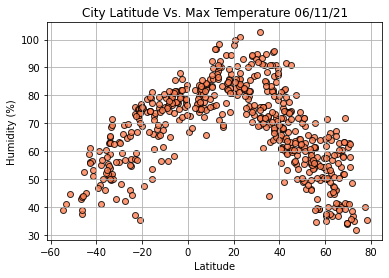

In [12]:
%matplotlib inline

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = 'black',
           color='coral',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.legend = True
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig1.png")
plt.show()

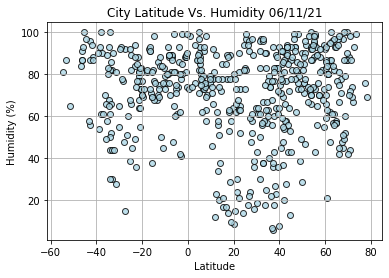

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor = 'black',
           color='lightblue',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig2.png")
plt.show()

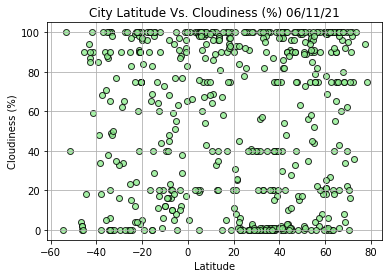

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black',
           color='lightgreen',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig3.png")
plt.show()

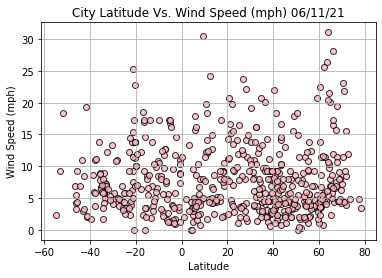

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black',
           color='lightpink',
           linewidths=1,
           marker = "o",
           alpha = 0.8, label = 'Cities')

# Incorporate the other graph properties.
plt.title("City Latitude Vs. Wind Speed (mph) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Weather Data/Fig4.png")
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values,y_values, title, y_label,text_cordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept,r_value, p_value,std_err) = linregress(x_values,y_values)
    
     # Calculate the regression line "y values" from the slope and intercept. (mx+b)
    regress_values = x_values * slope + intercept
    
    #get the equation for the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #create scatter plt and regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r") # line chart which corresponds to regression
    
    #Annotate the text for linear equation(display linear equation in the chart at the given position)
    plt.annotate(line_eq,text_cordinates, fontsize = 15, color="red")

    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [17]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-06-11 20:39:17
Lat                      -46.1927
Lng                       168.864
Max Temp                    37.67
Humidity                       91
Cloudiness                      0
Wind Speed                   3.31
Name: 13, dtype: object

In [18]:
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df[(city_data_df["Lat"]<0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2021-06-11 20:39:12,-0.6000,73.0833,83.57,74,65,10.92
2,Punta Arenas,CL,2021-06-11 20:39:13,-53.1500,-70.9167,41.11,87,100,9.22
3,Atuona,PF,2021-06-11 20:36:53,-9.8000,-139.0333,78.98,76,40,17.34
5,Madingou,CG,2021-06-11 20:39:14,-4.1536,13.5500,77.23,74,63,3.98
7,Hermanus,ZA,2021-06-11 20:39:15,-34.4187,19.2345,62.91,68,100,1.79


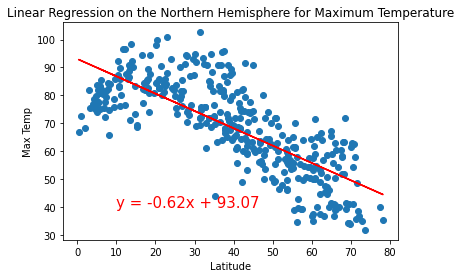

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call the function plot_linear_regression(x_values,y_values, title, y_label,text_cordinates)
# Import linregress
from scipy.stats import linregress
plot_linear_regression(x_values,y_values,
                      "Linear Regression on the Northern Hemisphere for Maximum Temperature",
                      'Max Temp',
                      (10,40))

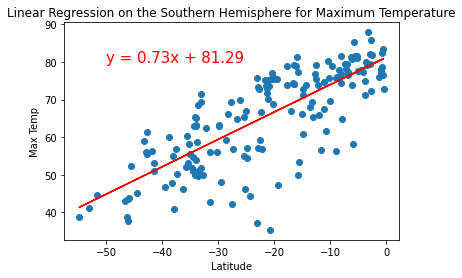

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call the function plot_linear_regression(x_values,y_values, title, y_label,text_cordinates)
# Import linregress
from scipy.stats import linregress
plot_linear_regression(x_values,y_values,
                      "Linear Regression on the Southern Hemisphere for Maximum Temperature",
                      'Max Temp', (-50,80))

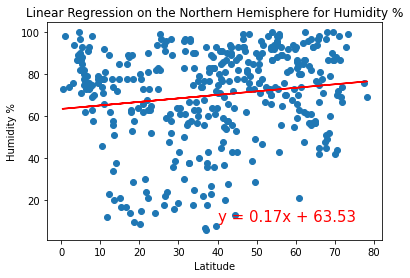

In [25]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
#call the function plot_linear_regression(x_values,y_values, title, y_label,text_cordinates)
# Import linregress
from scipy.stats import linregress
plot_linear_regression(x_values,y_values,
                      "Linear Regression on the Northern Hemisphere for Humidity %",
                      'Humidity %', (40,10))

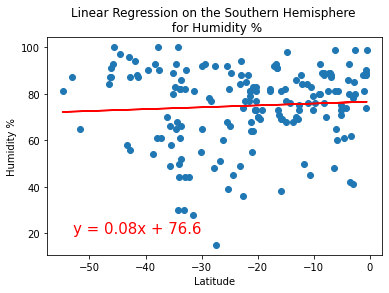

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
#call the function plot_linear_regression(x_values,y_values, title, y_label,text_cordinates)
# Import linregress
from scipy.stats import linregress
plot_linear_regression(x_values,y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                       " for Humidity %",
                      'Humidity %', (-53,20))

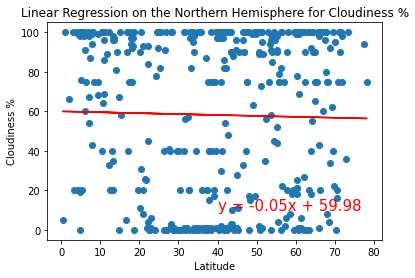

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#call the function plot_linear_regression(x_values,y_values, title, y_label,text_cordinates)
# Import linregress
from scipy.stats import linregress
plot_linear_regression(x_values,y_values,
                      "Linear Regression on the Northern Hemisphere for Cloudiness %",
                      'Cloudiness %', (40,10))

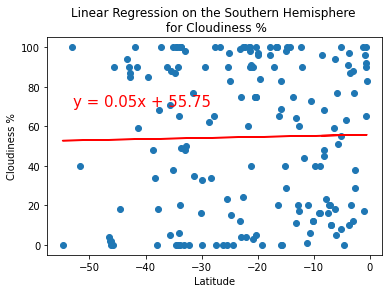

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#call the function plot_linear_regression(x_values,y_values, title, y_label,text_cordinates)
# Import linregress
from scipy.stats import linregress
plot_linear_regression(x_values,y_values,
                      "Linear Regression on the Southern Hemisphere \n"
                       " for Cloudiness %",
                      'Cloudiness %', (-53,70))

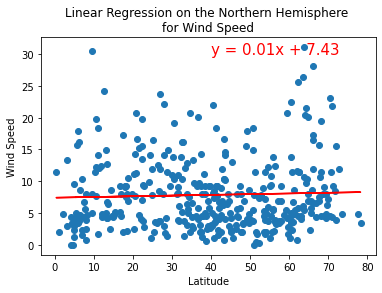

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n"
                        'for Wind Speed', 'Wind Speed',(40,30))

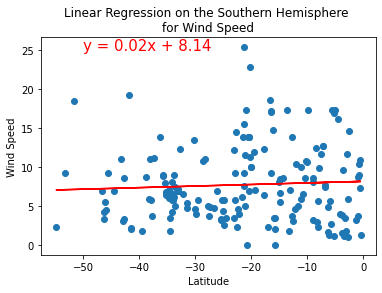

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'
                        'for Wind Speed', 'Wind Speed',(-50,25))